In [1]:
!pip3 install torch

In [2]:
import torch

In [4]:
from torch.nn import Linear

In [3]:
import torch.nn as nn

In [5]:
x = torch.randn(100,1)*10

In [6]:
y = x + torch.randn(100,1)*3

Text(0.5, 0, 'x')

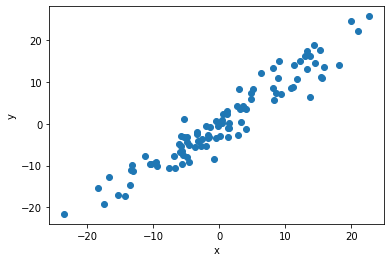

In [7]:
import matplotlib.pyplot as plt
plt.plot(x.numpy(),y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [8]:
class LR(nn.Module):
  def __init__(self,in_feature, out_feature):
    super().__init__()
    self.linear = nn.Linear(in_feature,out_feature)
  def forward(self,x):
    return self.linear(x)  


In [9]:
torch.manual_seed(1)
model = LR(1,1)

In [10]:
model

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
[w,b] = model.parameters()

In [12]:
w,b

(Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True))

In [13]:
w[0,0].item(), b.item()

(0.5152631998062134, -0.44137823581695557)

In [14]:
def get_params():
  return (w[0,0].item(), b.item())

In [15]:
import numpy as np

In [16]:
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1, 'r')
  plt.scatter(x,y)
  plt.show()

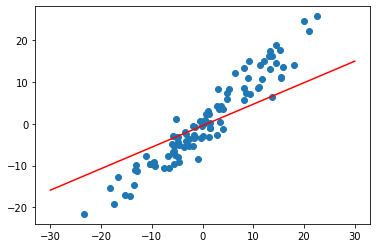

In [17]:
plot_fit('linear line')

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred,y)
  print('epoch is {} and the loss is {}'.format(i,loss.item()))
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch is 0 and the loss is 31.23556900024414
epoch is 1 and the loss is 24.628131866455078
epoch is 2 and the loss is 19.931167602539062
epoch is 3 and the loss is 16.591928482055664
epoch is 4 and the loss is 14.217609405517578
epoch is 5 and the loss is 12.529074668884277
epoch is 6 and the loss is 11.327947616577148
epoch is 7 and the loss is 10.47323989868164
epoch is 8 and the loss is 9.864762306213379
epoch is 9 and the loss is 9.43130874633789
epoch is 10 and the loss is 9.122282981872559
epoch is 11 and the loss is 8.901715278625488
epoch is 12 and the loss is 8.744051933288574
epoch is 13 and the loss is 8.631129264831543
epoch is 14 and the loss is 8.550034523010254
epoch is 15 and the loss is 8.491591453552246
epoch is 16 and the loss is 8.4492769241333
epoch is 17 and the loss is 8.418458938598633
epoch is 18 and the loss is 8.395835876464844
epoch is 19 and the loss is 8.379069328308105
epoch is 20 and the loss is 8.366488456726074
epoch is 21 and the loss is 8.35690879821

Text(0, 0.5, 'losses')

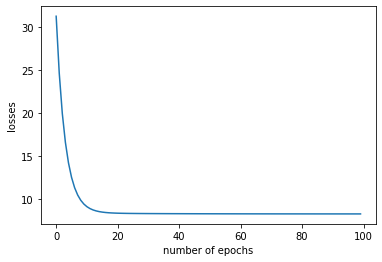

In [21]:
plt.plot(range(epochs),losses)
plt.xlabel('number of epochs')
plt.ylabel('losses')

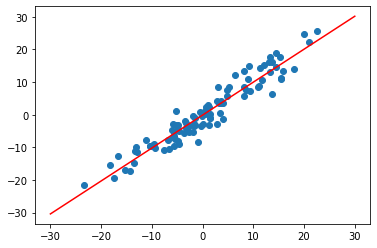

In [22]:
plot_fit('trained model')